In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
airlines = pd.read_csv("data-csv/airlines.csv")
airports = pd.read_csv("data-csv/airports.csv")
flights = pd.read_csv("data-csv/flights.csv")
planes = pd.read_csv("data-csv/planes.csv")
weather = pd.read_csv("data-csv/weather.csv")
weather_with_3_doublons = pd.read_csv("data-csv/weather_with_3_doublons.csv")

In [3]:
#pd.Series(airports['faa'].unique())
airports['faa'].nunique() == len(airports['faa'])

True

In [4]:
#1
print('\n#1 \n')
print('There is', len(airports['faa']), 'airports.')

nbAirportsNoSummerChange = len(airports[airports['dst'] == 'N'])
print('There is', nbAirportsNoSummerChange, 'airports that doesn\'t change time in summer.')

nbTimeZone = airports['tzone'].nunique()
print('There is', nbTimeZone, 'timezones.')

print('There is', len(airlines), 'companies.')

print('There is', len(planes), 'planes.')

nbCanceledFlights = len(flights[flights['dep_time'] == ' '])
print('There is', nbCanceledFlights, 'canceled flights.')


#1 

There is 1458 airports.
There is 23 airports that doesn't change time in summer.
There is 10 timezones.
There is 16 companies.
There is 3322 planes.
There is 8255 canceled flights.


In [5]:
#2
print('\n#2 \n')
mostUsedCarrier = flights['carrier'].mode()[0]
mostUsedCarrier

mostFrequentedAirport = airlines[airlines['carrier'] == mostUsedCarrier]['name'].values[0]
print(mostFrequentedAirport, 'is the most frequented airport of the United States.')


#2 

United Air Lines Inc. is the most frequented airport of the United States.


In [6]:
def getCarrier(dest):
    carrier = flights[flights['dest'] == dest]['carrier']
    return carrier.mode()[0]


In [7]:
def getTopNameDestination(carrier):
    return airlines[airlines['carrier'] == carrier]['name'].values[0]

def getWorstNameDestination(carrier):
    return airlines[airlines['carrier'] == carrier]['name'].values[-1]

In [25]:
topDest = flights['dest'].value_counts(ascending = False). \
    head(10).reset_index(). \
    rename({'index':'faa'}, axis = 1). \
    merge(airports[['faa', 'name']], how='inner', on='faa')
topDest
#topDest.plot.bar('name', 'dest', rot=70)

,faa,dest,name
0,ORD,17283,Chicago Ohare Intl
1,ATL,17215,Hartsfield Jackson Atlanta Intl
2,LAX,16174,Los Angeles Intl
3,BOS,15508,General Edward Lawrence Logan Intl
4,MCO,14082,Orlando Intl
5,CLT,14064,Charlotte Douglas Intl
6,SFO,13331,San Francisco Intl
7,FLL,12055,Fort Lauderdale Hollywood Intl
8,MIA,11728,Miami Intl
9,DCA,9705,Ronald Reagan Washington Natl


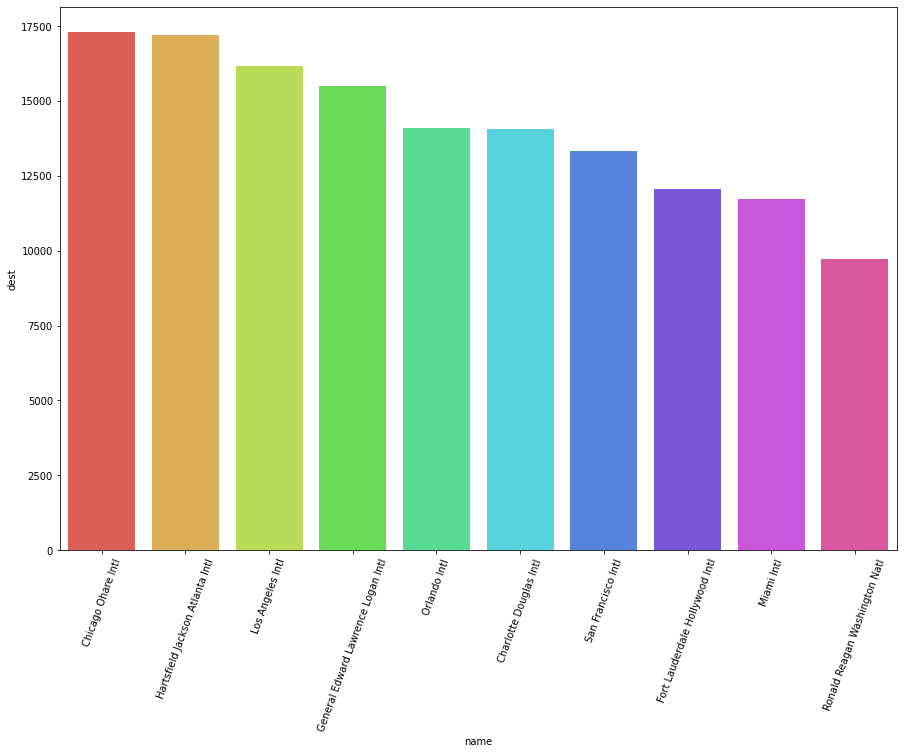

In [9]:
import seaborn as sns

sns.barplot(x = 'name', y = 'dest', data = topDest,
            palette = 'hls',
            #order = ['male', 'female'],
            capsize = 0.5,
            saturation = 8,
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

d = plt.xticks(rotation=70)



In [10]:
#cond1 = flights['carrier'].values == 'UA'
#cond2 = flights['origin'] == 'JFK'
#flights[cond1 & cond2]
#flights.query('carrier == "UA" and origin == "JFK"')
flights['carrier'].values == "UA"

array([ True,  True, False, ..., False, False, False])

In [11]:
flights['carrier'] == "UA"

0          True
1          True
2         False
3         False
4         False
          ...  
336771    False
336772    False
336773    False
336774    False
336775    False
Name: carrier, Length: 336776, dtype: bool

In [12]:
i = 1
n = 300 #testing for 300 dest
topDest = flights['dest'].value_counts()[:n].index.tolist()
allTopDest = []
finalTopDestinationName = []

for dest in topDest:
    allTopDest.append(getTopNameDestination(getCarrier(dest)))

for dest in allTopDest:
    # get top 10 most frequent destination
    if dest not in finalTopDestinationName and len(finalTopDestinationName) < 10:
        finalTopDestinationName.append(dest)
 

In [13]:
worstDest = flights['dest'].value_counts().iloc[::-1].head(30)
allWorstDest = []
finalWorstDestinationName = []

for dest in worstDest.index.tolist():
    allWorstDest.append(getWorstNameDestination(getCarrier(dest)))

for dest in allWorstDest:
    # get wost 10 most frequent destination
    if dest not in finalWorstDestinationName and len(finalWorstDestinationName) < 10:
        finalWorstDestinationName.append(dest)

In [14]:
totalFlights = len(flights)

def getPourcentage(nbFlight):
    return (nbFlight * 100) / totalFlights

In [15]:
topTenDest = flights['dest'].value_counts()[:10]
i = 0

for flight in topTenDest:
    print(round(getPourcentage(flight), 1), '% : ', finalTopDestinationName[i])
    i += 1


5.1 % :  United Air Lines Inc.
5.1 % :  Delta Air Lines Inc.
4.8 % :  JetBlue Airways
4.6 % :  US Airways Inc.
4.2 % :  American Airlines Inc.
4.2 % :  Envoy Air
4.0 % :  ExpressJet Airlines Inc.
3.6 % :  Southwest Airlines Co.
3.5 % :  Endeavor Air Inc.
2.9 % :  AirTran Airways Corporation


In [16]:
i = 0
for flight in worstDest:
    print(round(getPourcentage(flight), 6), '% : ', finalWorstDestinationName[i])
    i += 1

0.000297 % :  Endeavor Air Inc.
0.000297 % :  US Airways Inc.
0.002375 % :  United Air Lines Inc.
0.002969 % :  ExpressJet Airlines Inc.
0.004454 % :  Delta Air Lines Inc.
0.004454 % :  Virgin America
0.005048 % :  Envoy Air
0.005642 % :  JetBlue Airways


IndexError: list index out of range

In [ ]:
flights['tailnum'].value_counts()[:10]

In [ ]:
#4044 unique planes
mostFlights = flights['tailnum'].value_counts()[:10].index.tolist()
i = 1

for plane in mostFlights:
    print('#', i, 'Plane n°', plane)
    i += 1

In [ ]:
#3

airlines

In [ ]:
flights

In [ ]:
airlines

In [18]:
def getOriginByCarrier(carrier):
    return flights[flights['carrier'] == carrier]

nbOriginByCarrier = []

#for carrierTag in airlines['carrier'].tolist():
    #newValue = pd.DataFrame({
        #'FJK': getOriginByCarrier(carrierTag)[flights['origin'] == 'FJK'].value_counts()
    #})
    #nbOriginByCarrier.append(newValue)



In [ ]:
test = flights[flights['carrier'] == '9E']
test2 = test[test['origin'] == 'EWR']
len(test2)

In [120]:
#Q.3
originLength = flights['dest'].value_counts(ascending = False). \
    head(10).reset_index(). \
    rename({'index':'faa'}, axis = 1). \
    merge(airports[['faa', 'name']], how='inner', on='faa')

#topDest.plot.bar('name', 'dest', rot=70)
originLength


#sns.catplot(y="deck", hue="class", kind="count",
 #           palette="pastel", edgecolor=".6",
  #          data=titanic)

,faa,dest,name
0,ORD,17283,Chicago Ohare Intl
1,ATL,17215,Hartsfield Jackson Atlanta Intl
2,LAX,16174,Los Angeles Intl
3,BOS,15508,General Edward Lawrence Logan Intl
4,MCO,14082,Orlando Intl
5,CLT,14064,Charlotte Douglas Intl
6,SFO,13331,San Francisco Intl
7,FLL,12055,Fort Lauderdale Hollywood Intl
8,MIA,11728,Miami Intl
9,DCA,9705,Ronald Reagan Washington Natl


In [115]:
originJfk = []
originEwr = []
originLga = []
indexAirlines = []

def getOriginLengthForAirline(flightList, origin):
    return len(flightList[flightList['origin'] == origin])

for carrierTag in airlines['carrier'].tolist():
    airlineList = getOriginByCarrier(carrierTag)
    originJfk.append(getOriginLengthForAirline(airlineList, 'JFK'))
    originEwr.append(getOriginLengthForAirline(airlineList, 'EWR'))
    originLga.append(getOriginLengthForAirline(airlineList, 'LGA'))
    indexAirlines.append(carrierTag)

newValue = pd.DataFrame({
    'FJK': originJfk,
    'EWR': originEwr,
    'LGA': originLga
    }, index = indexAirlines)

In [117]:
flightHouston = flights[(flights.dest=='IAH')] + flights[(flights.dest=='HOU')]
flightHouston.shape[0]

9313

In [73]:
flightsNyc = flights[flights.dest=='SEA'] #airlines
flightsNyc.shape[0]

3923

In [83]:
flightsNycCarrier = flightsNyc['carrier'].nunique()
flightsNycCarrier

5

In [88]:
flightsNycTailnum = flightsNyc['tailnum'].nunique()
flightsNycTailnum

936

In [105]:
airlines


,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [119]:
 flights['dest'].value_counts(ascending = False)

ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
       ...  
MTJ       15
SBN       10
ANC        8
LGA        1
LEX        1
Name: dest, Length: 105, dtype: int64